In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

Loading & combining the Datasets

In [2]:
orders = pd.read_csv("orders.csv")
users = pd.read_json("users.json")

with open("restaurants.sql", "r", encoding="utf-8") as f:
    sql_script = f.read()
    
conn = sqlite3.connect(":memory:")
conn.executescript(sql_script)

restaurants = pd.read_sql_query("SELECT * FROM restaurants", conn)

In [3]:
# Changing dtype of 'order_date' to datetime
orders["order_date"] = pd.to_datetime(orders["order_date"], format="%d-%m-%Y", errors="coerce")

print("DATASET: Orders")
print("Shape (Rows, Columns):")
orders.shape

print("\nColumn Names:")
for i, col in enumerate(orders.columns, 1):
    print(f"{i}. {col}")
    
print("\nFirst 5 Rows:")
orders.head()

DATASET: Orders
Shape (Rows, Columns):

Column Names:
1. order_id
2. user_id
3. restaurant_id
4. order_date
5. total_amount
6. restaurant_name

First 5 Rows:


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,2023-02-18,842.97,New Foods Chinese
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian


In [4]:
print(orders.isna().sum())
print(orders.dtypes)

order_id           0
user_id            0
restaurant_id      0
order_date         0
total_amount       0
restaurant_name    0
dtype: int64
order_id                    int64
user_id                     int64
restaurant_id               int64
order_date         datetime64[ns]
total_amount              float64
restaurant_name            object
dtype: object


In [5]:
print("DATASET: Restaurants")
print("Shape (Rows, Columns):")
restaurants.shape

print("\nColumn Names:")
for i, col in enumerate(restaurants.columns, 1):
    print(f"{i}. {col}")

print("\nFirst 5 Rows:")
restaurants.head()

DATASET: Restaurants
Shape (Rows, Columns):

Column Names:
1. restaurant_id
2. restaurant_name
3. cuisine
4. rating

First 5 Rows:


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [6]:
print(users.isna().sum())
print(users.dtypes)

user_id       0
name          0
city          0
membership    0
dtype: int64
user_id        int64
name          object
city          object
membership    object
dtype: object


In [7]:
print("DATASET: Restaurants")
print("Shape (Rows, Columns):")
print(restaurants.shape)

print("\nColumn Names:")
for i, col in enumerate(restaurants.columns, 1):
    print(f"{i}. {col}")
    
print("\nFirst 5 Rows:")
restaurants.head()

DATASET: Restaurants
Shape (Rows, Columns):
(500, 4)

Column Names:
1. restaurant_id
2. restaurant_name
3. cuisine
4. rating

First 5 Rows:


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [8]:
print(restaurants.isna().sum())
print(restaurants.dtypes)

restaurant_id      0
restaurant_name    0
cuisine            0
rating             0
dtype: int64
restaurant_id        int64
restaurant_name     object
cuisine             object
rating             float64
dtype: object


In [9]:
merged_1 = orders.merge(users, on="user_id", how="left")
final_df = merged_1.merge(restaurants, on="restaurant_id", how="left")

final_df.to_csv("final_food_delivery_dataset.csv", index=False)

print(final_df.shape)
print(final_df.columns)
print(final_df.isna().sum())
final_df.head()

(10000, 12)
Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')
order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


1. Order trends over time

In [10]:
# Save output plots in a folder
import os

output_dir = "output_plots"
os.makedirs(output_dir, exist_ok=True)

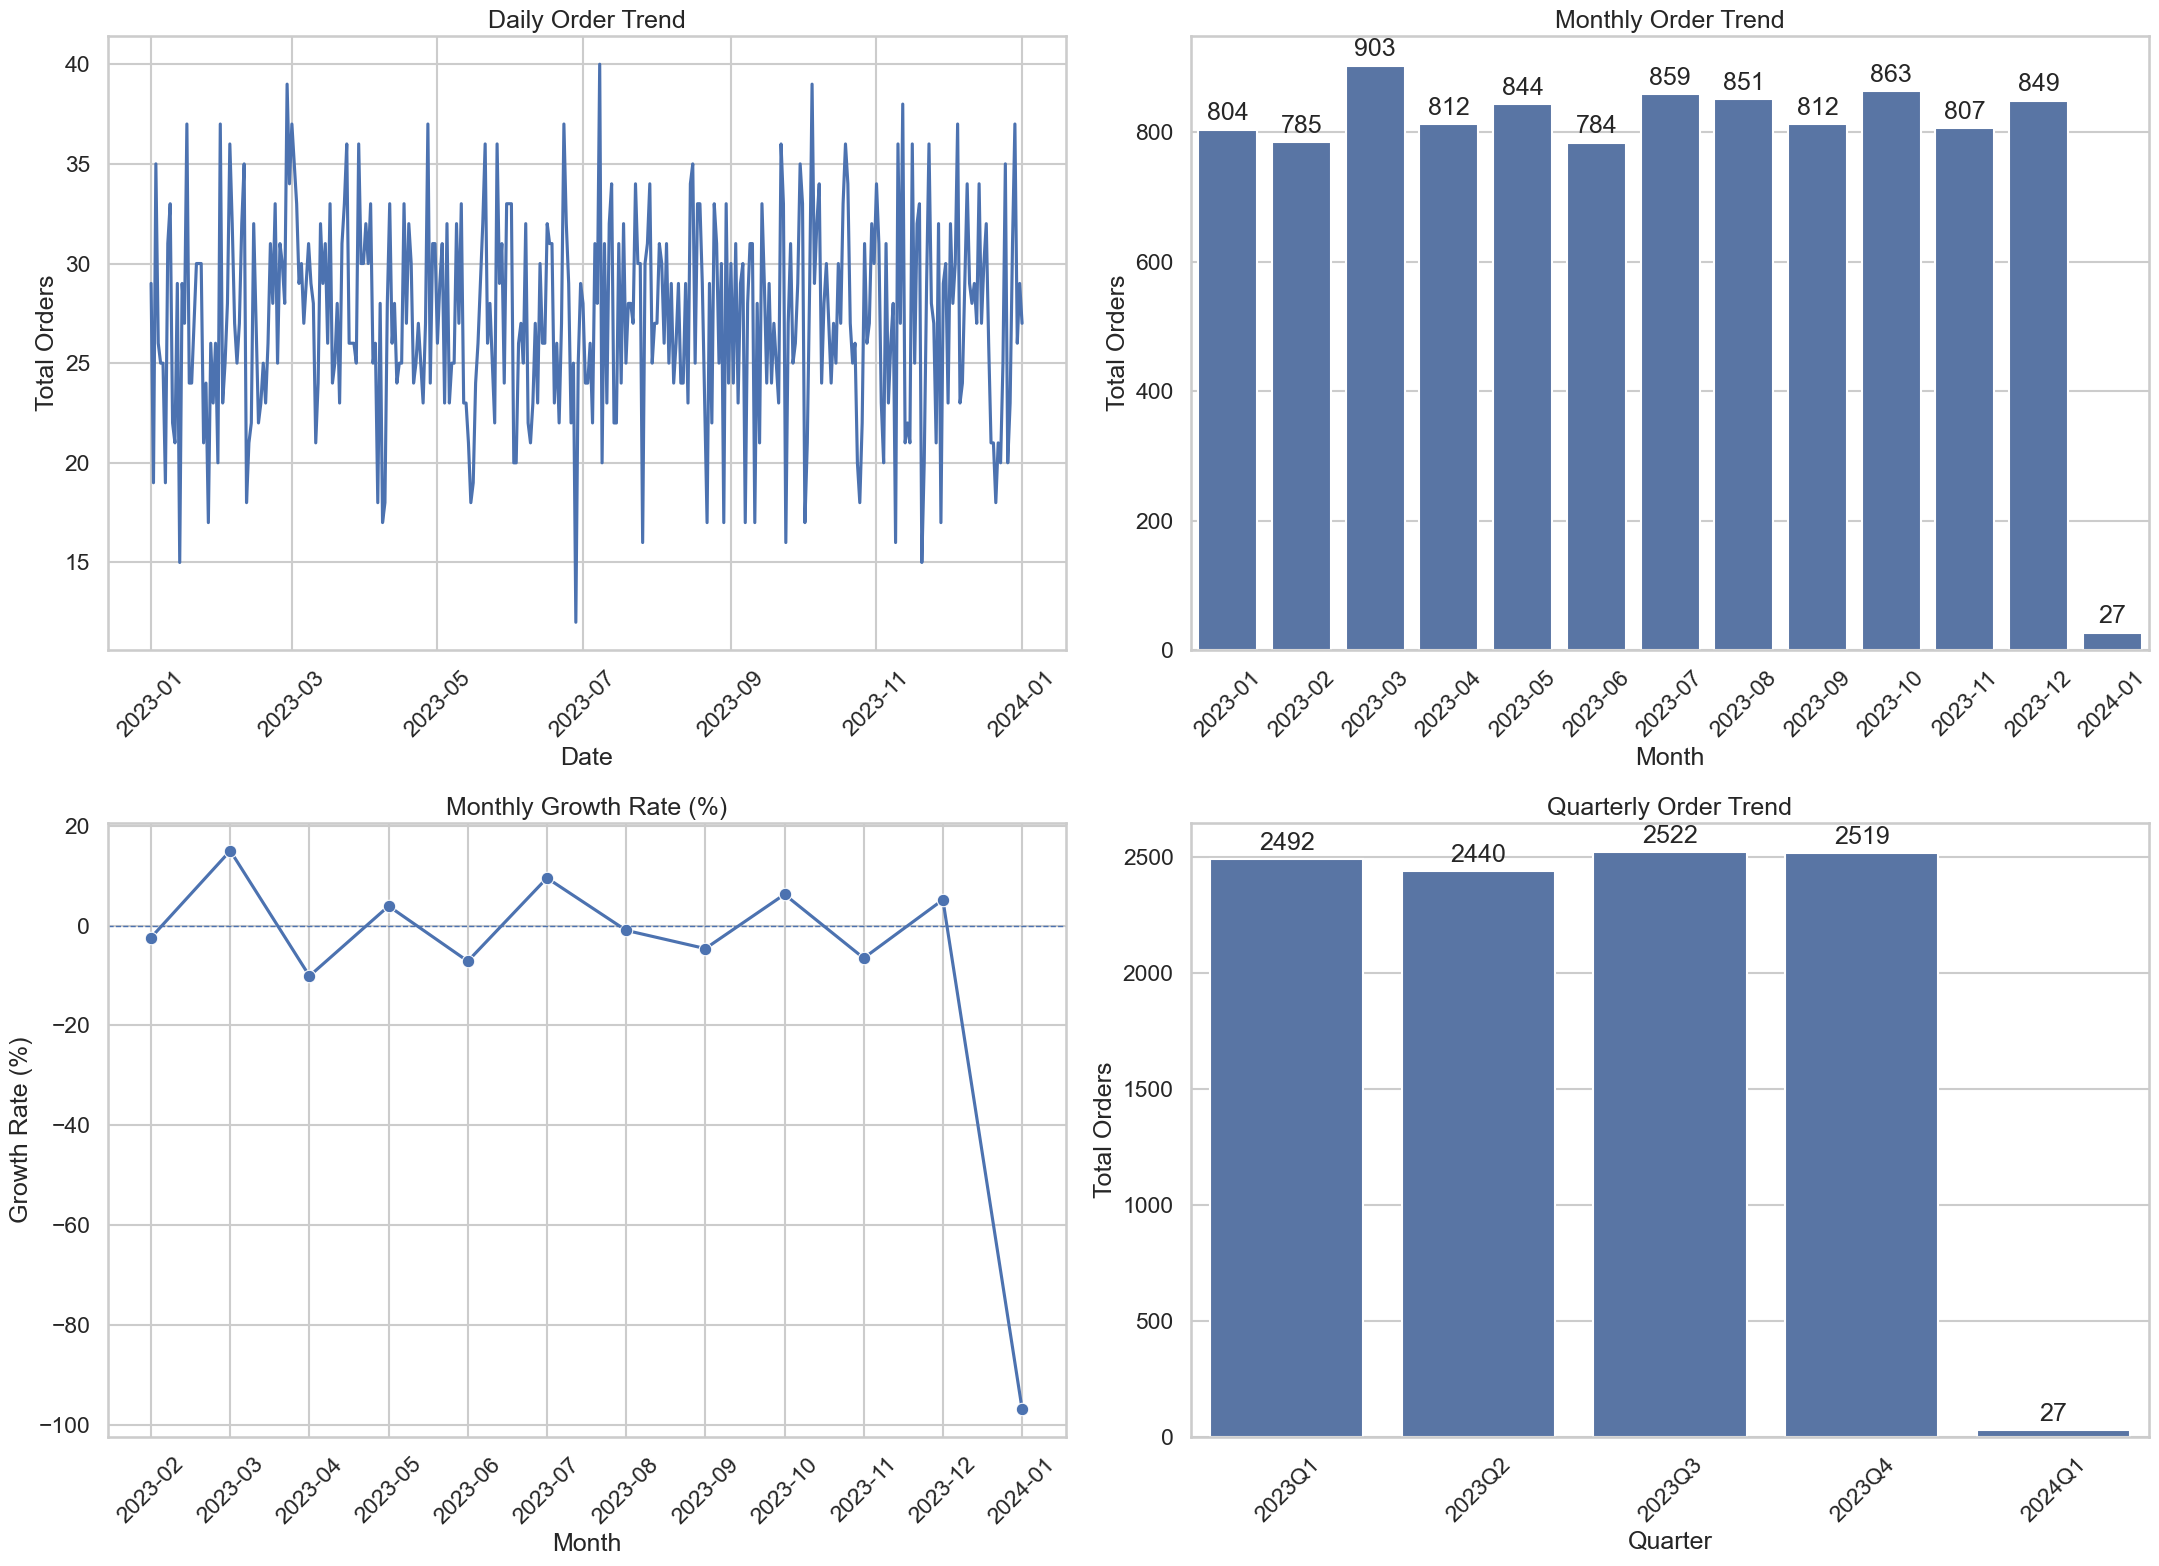

In [11]:
sns.set_theme(style="whitegrid", palette="deep", context="talk")

final_df["order_date"] = pd.to_datetime(final_df["order_date"], errors="coerce")

# Prepare daily order data
daily_orders = (
    final_df
    .dropna(subset=["order_date"])
    .groupby("order_date")
    .size()
    .reset_index(name="total_orders")
)

# Prepare monthly order data
final_df["month"] = final_df["order_date"].dt.to_period("M")

monthly_orders = (
    final_df
    .dropna(subset=["month"])
    .groupby("month")
    .size()
    .reset_index(name="total_orders")
)

monthly_orders["month_str"] = monthly_orders["month"].astype(str)

# Calculate monthly growth rate
monthly_orders = monthly_orders.sort_values("month")
monthly_orders["growth_rate"] = monthly_orders["total_orders"].pct_change() * 100

# Prepare quarterly order data
quarterly_orders = (
    final_df
    .dropna(subset=["order_date"])
    .assign(quarter=final_df["order_date"].dt.to_period("Q"))
    .groupby("quarter")
    .size()
    .reset_index(name="total_orders")
)

quarterly_orders["quarter_str"] = quarterly_orders["quarter"].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(22, 16))


# Daily Order Trend
sns.lineplot(data=daily_orders, x="order_date", y="total_orders", ax=axes[0, 0])
axes[0, 0].set_title("Daily Order Trend")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Total Orders")
axes[0, 0].tick_params(axis="x", rotation=45)


# Monthly Order Trend
bar_ax_m = sns.barplot(data=monthly_orders, x="month_str", y="total_orders", ax=axes[0, 1])
axes[0, 1].set_title("Monthly Order Trend")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Total Orders")
axes[0, 1].tick_params(axis="x", rotation=45)

for c in bar_ax_m.containers:
    bar_ax_m.bar_label(c, fmt="%d", padding=3)


# Monthly Growth Rate
sns.lineplot(data=monthly_orders, x="month_str", y="growth_rate", marker="o", ax=axes[1, 0])
axes[1, 0].set_title("Monthly Growth Rate (%)")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Growth Rate (%)")
axes[1, 0].tick_params(axis="x", rotation=45)
axes[1, 0].axhline(0, linestyle="--", linewidth=1)


# Quarterly Order Trend
bar_ax_q = sns.barplot(data=quarterly_orders, x="quarter_str", y="total_orders", ax=axes[1, 1])
axes[1, 1].set_title("Quarterly Order Trend")
axes[1, 1].set_xlabel("Quarter")
axes[1, 1].set_ylabel("Total Orders")
axes[1, 1].tick_params(axis="x", rotation=45)

for c in bar_ax_q.containers:
    bar_ax_q.bar_label(c, fmt="%d", padding=3)


plt.tight_layout()
plt.savefig(f"{output_dir}/daily_monthly_growth_quarterly_trends.png", dpi=200, bbox_inches="tight")
plt.show()


Order Trends Over Time

- Daily and monthly trends show consistent demand with noticeable seasonal variations.
- Growth and quarterly analysis indicate periods of expansion and slowdown in business performance.


2. User behavior patterns

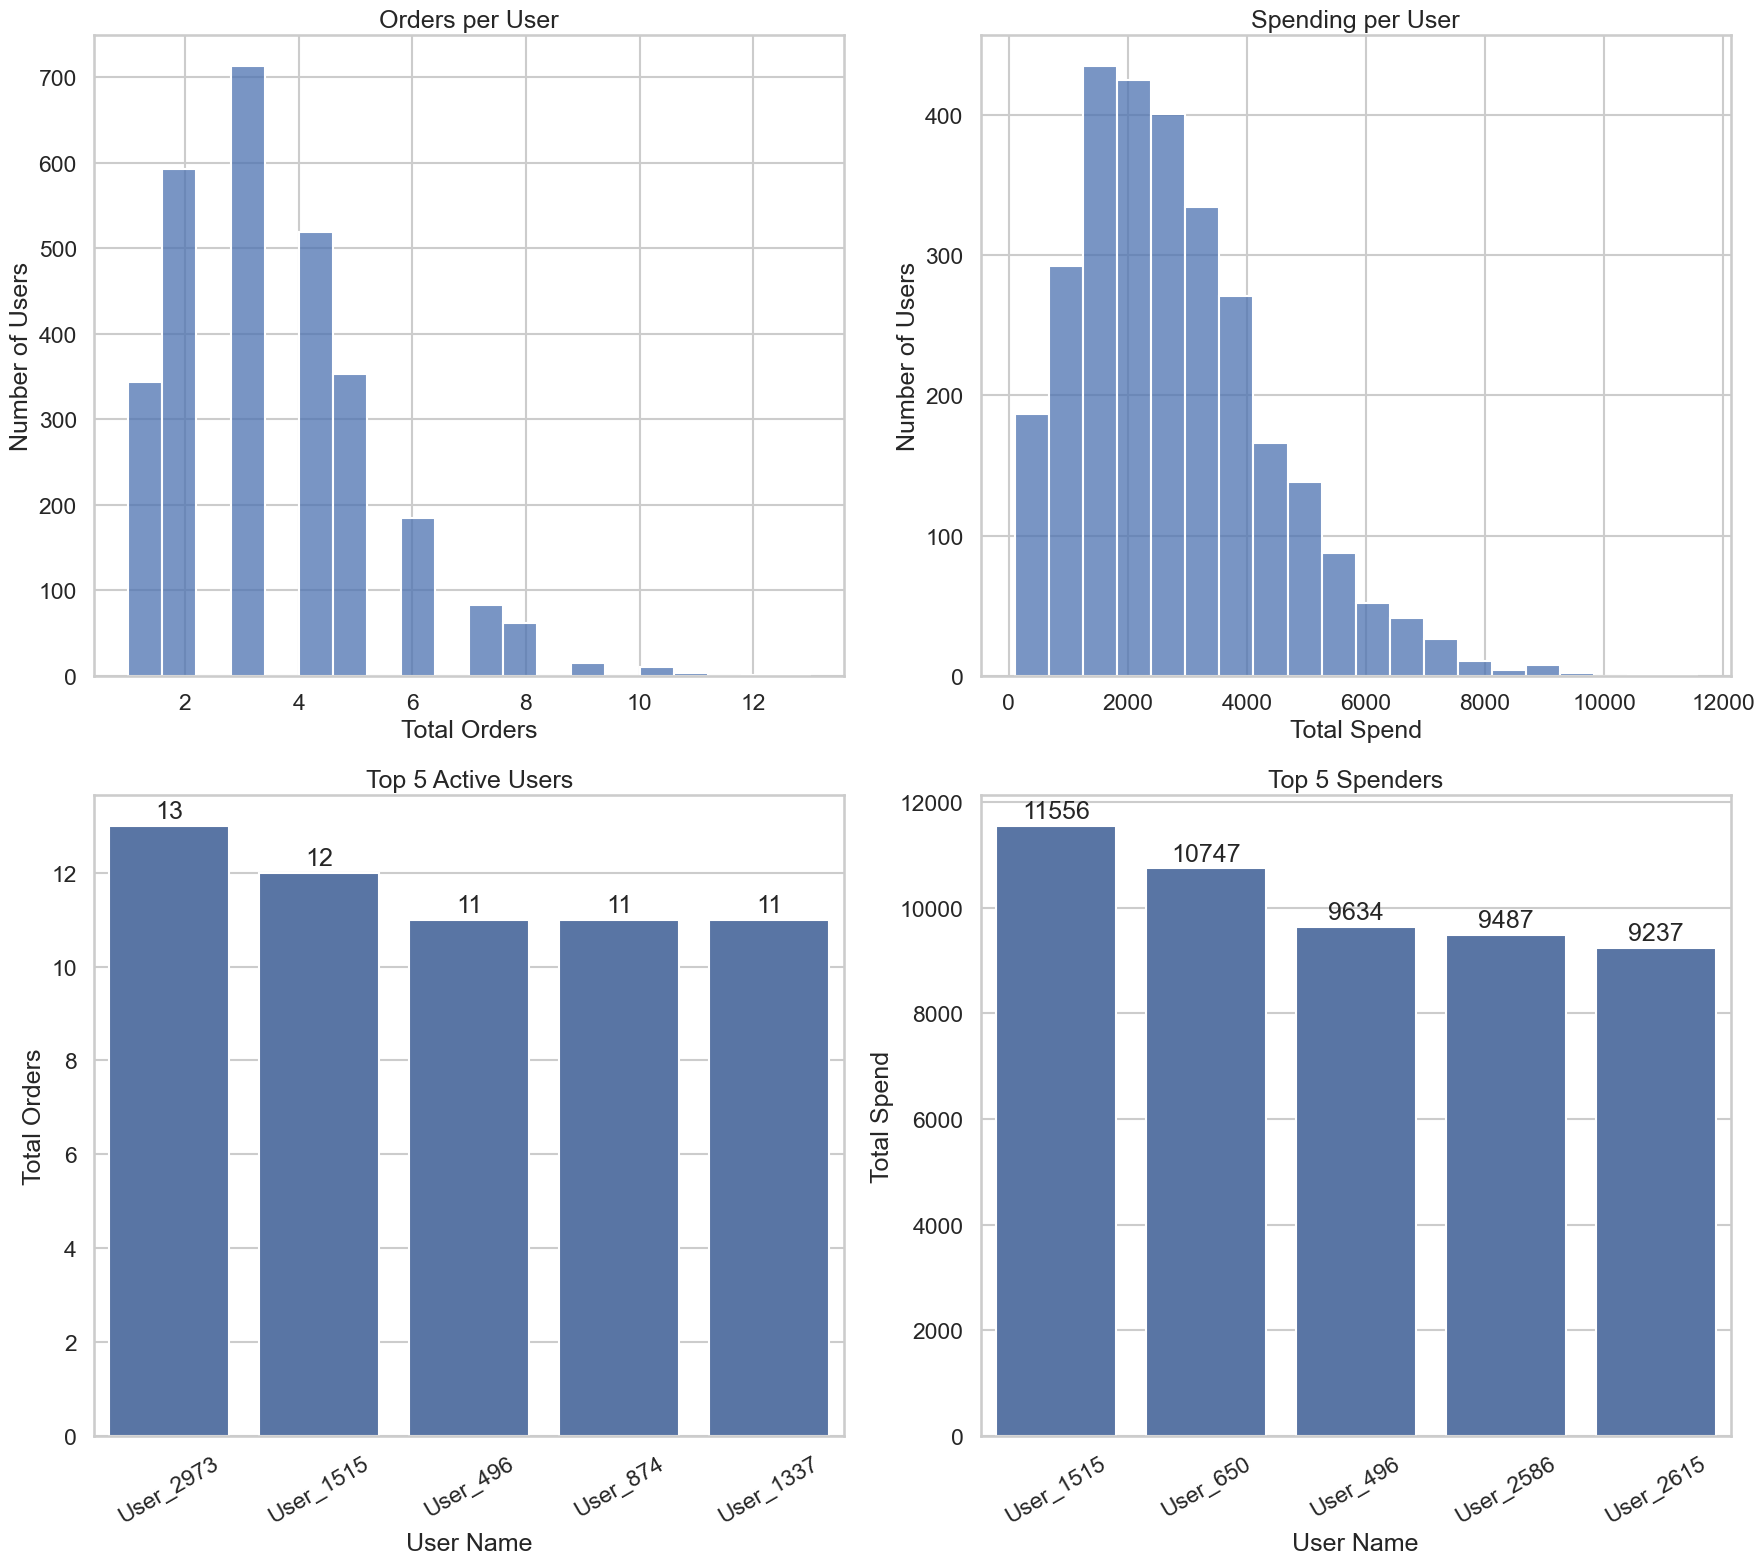

In [12]:
user_summary = (
    final_df
    .groupby(["user_id", "name"], as_index=False)
    .agg(
        total_orders=("order_id", "nunique"),
        total_spend=("total_amount", "sum")
    )
)

user_summary["avg_order_value"] = user_summary["total_spend"] / user_summary["total_orders"]

top5_active = user_summary.sort_values(["total_orders", "total_spend"], ascending=False).head(5)
top5_spend = user_summary.sort_values(["total_spend", "total_orders"], ascending=False).head(5)

fig, axes = plt.subplots(2, 2, figsize=(18, 16))


# Distribution of total orders per user
sns.histplot(data=user_summary, x="total_orders", bins=20, ax=axes[0, 0])
axes[0, 0].set_title("Orders per User")
axes[0, 0].set_xlabel("Total Orders")
axes[0, 0].set_ylabel("Number of Users")


# Distribution of total spending per user
sns.histplot(data=user_summary, x="total_spend", bins=20, ax=axes[0, 1])
axes[0, 1].set_title("Spending per User")
axes[0, 1].set_xlabel("Total Spend")
axes[0, 1].set_ylabel("Number of Users")


# Top 5 users by number of orders
ax1 = axes[1, 0]
sns.barplot(data=top5_active, x="name", y="total_orders", ax=ax1)
ax1.set_title("Top 5 Active Users")
ax1.set_xlabel("User Name")
ax1.set_ylabel("Total Orders")
ax1.tick_params(axis="x", rotation=30)

for c in ax1.containers:
    ax1.bar_label(c, fmt="%d", padding=2)


# Top 5 users by total spending
ax2 = axes[1, 1]
sns.barplot(data=top5_spend, x="name", y="total_spend", ax=ax2)
ax2.set_title("Top 5 Spenders")
ax2.set_xlabel("User Name")
ax2.set_ylabel("Total Spend")
ax2.tick_params(axis="x", rotation=30)

for c in ax2.containers:
    ax2.bar_label(c, fmt="%.0f", padding=2)


plt.tight_layout()
plt.savefig(f"{output_dir}/user_behavior.png", dpi=200, bbox_inches="tight")
plt.show()


User Behavior Patterns

- A small group of users contributes a large share of total orders and revenue.
- Top active and high-spending users represent key customers for retention strategies.


3. City-wise and cuisine-wise performance

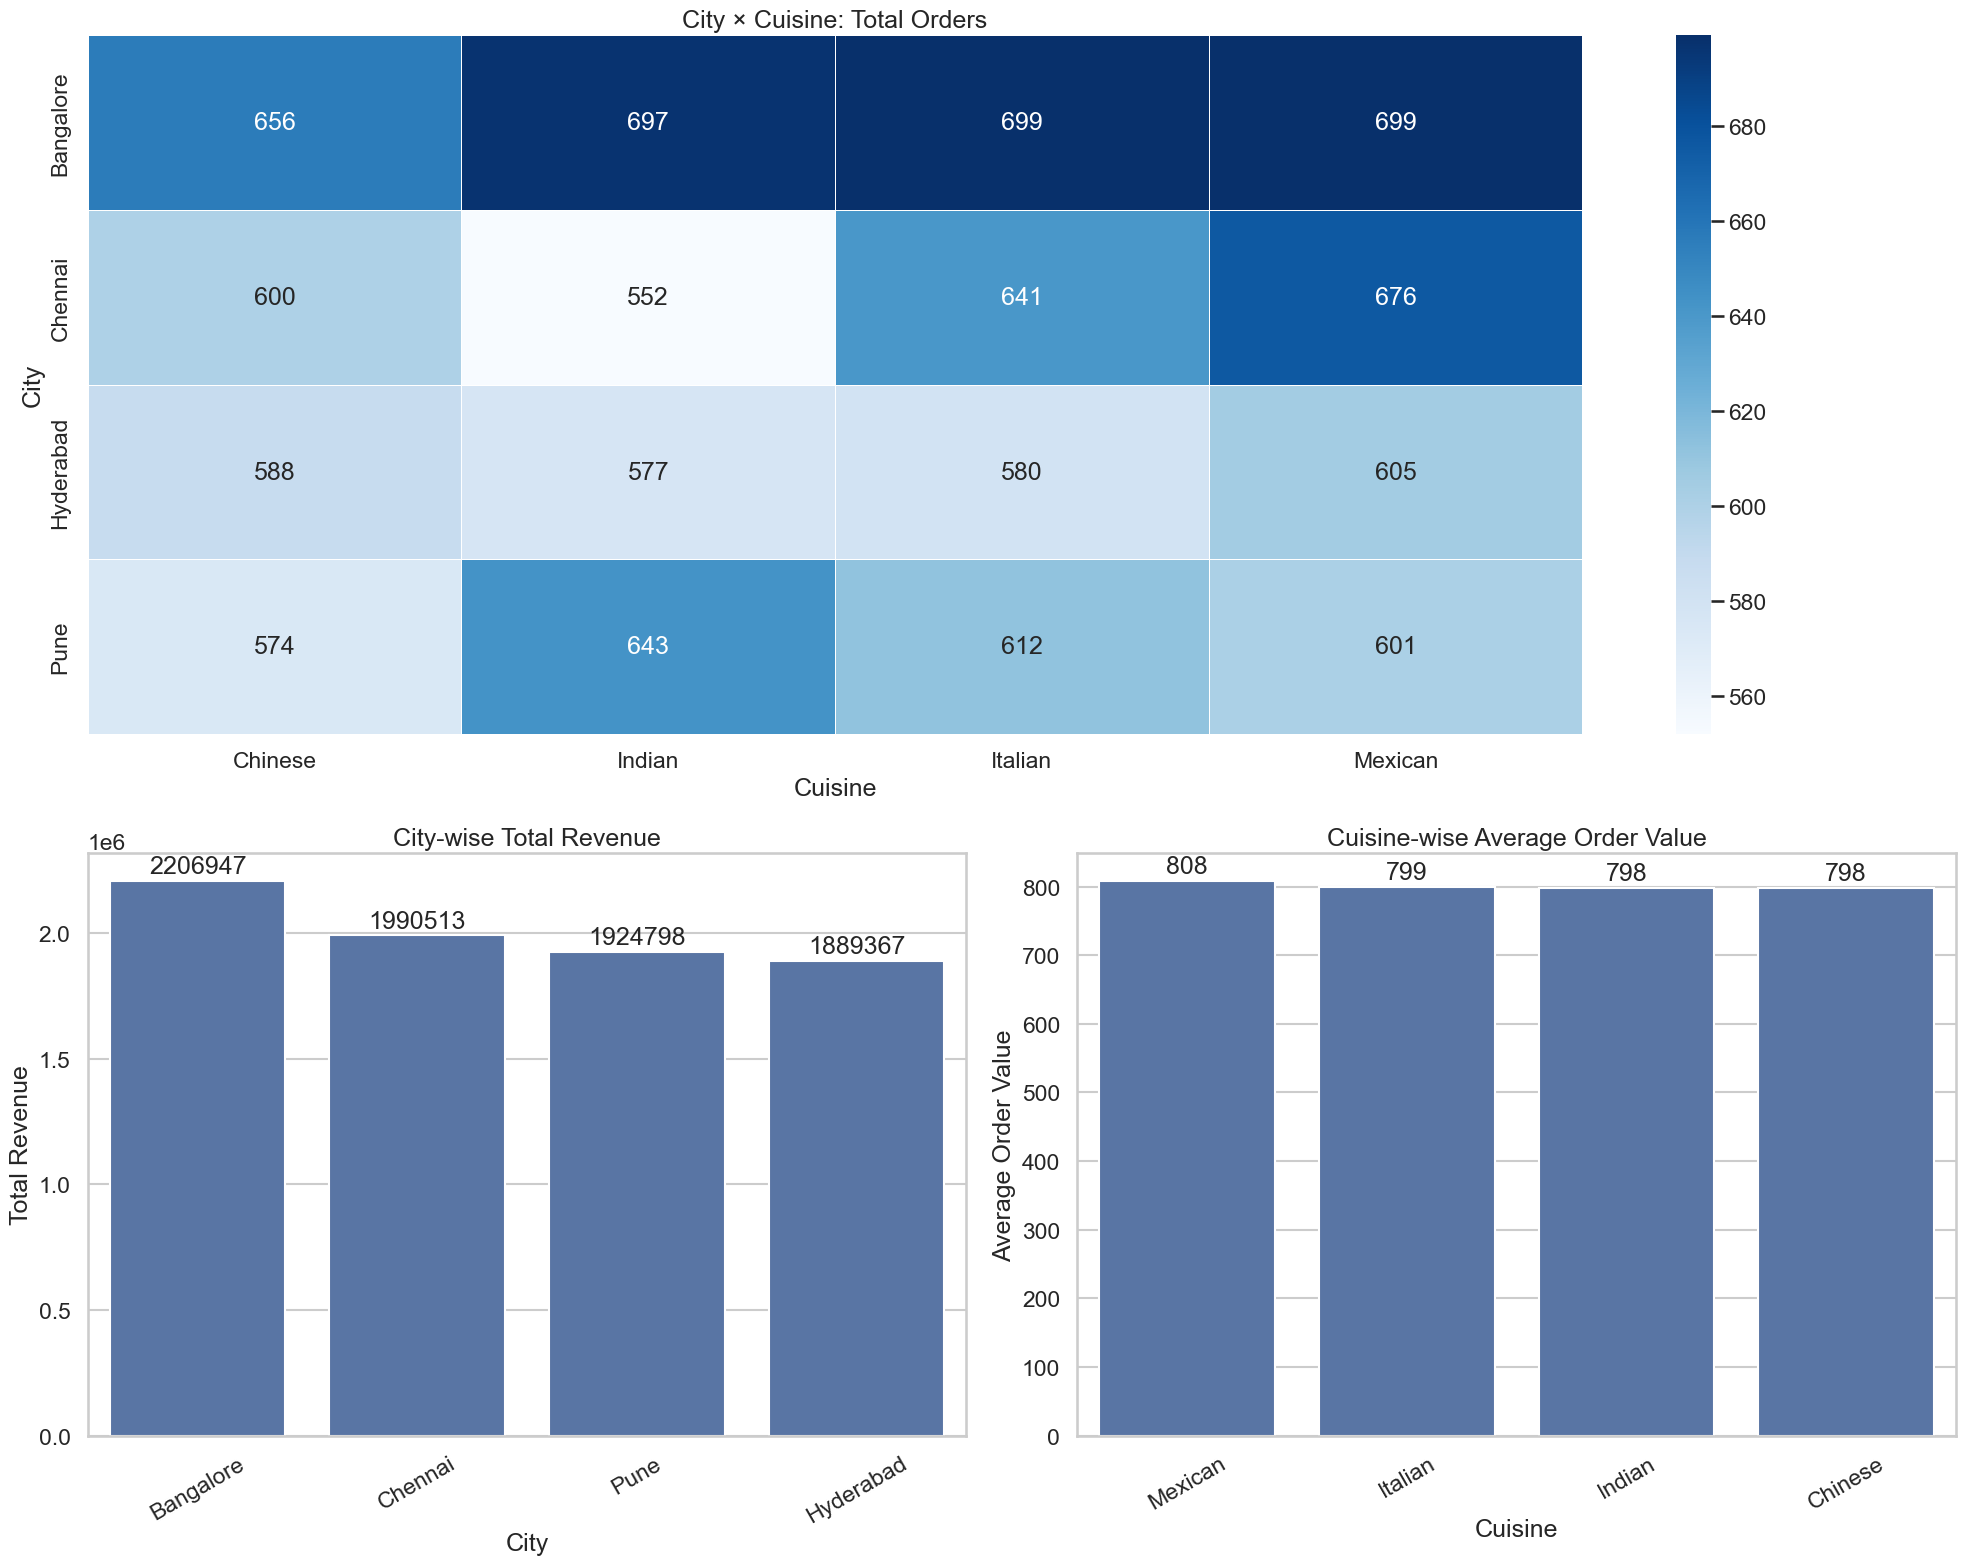

In [13]:
city_cuisine_orders = (
    final_df
    .dropna(subset=["city", "cuisine"])
    .groupby(["city", "cuisine"])
    .size()
    .reset_index(name="total_orders")
)

heatmap_data = (
    city_cuisine_orders
    .pivot(index="city", columns="cuisine", values="total_orders")
    .fillna(0)
    .astype(int)
)

city_revenue = (
    final_df
    .dropna(subset=["city"])
    .groupby("city", as_index=False)
    .agg(total_revenue=("total_amount", "sum"))
    .sort_values("total_revenue", ascending=False)
)

cuisine_aov = (
    final_df
    .dropna(subset=["cuisine"])
    .groupby("cuisine", as_index=False)
    .agg(avg_order_value=("total_amount", "mean"))
    .sort_values("avg_order_value", ascending=False)
)

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])


# City × Cuisine Heatmap: Total Orders
ax1 = fig.add_subplot(gs[0, :])

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5,
    linecolor="white",
    ax=ax1
)

ax1.set_title("City × Cuisine: Total Orders")
ax1.set_xlabel("Cuisine")
ax1.set_ylabel("City")


# City-wise Total Revenue
ax2 = fig.add_subplot(gs[1, 0])

bar_ax1 = sns.barplot(
    data=city_revenue,
    x="city",
    y="total_revenue",
    ax=ax2
)

ax2.set_title("City-wise Total Revenue")
ax2.set_xlabel("City")
ax2.set_ylabel("Total Revenue")
ax2.tick_params(axis="x", rotation=30)

for c in bar_ax1.containers:
    bar_ax1.bar_label(c, fmt="%.0f", padding=2)


# Cuisine-wise Average Order Value
ax3 = fig.add_subplot(gs[1, 1])

bar_ax2 = sns.barplot(
    data=cuisine_aov,
    x="cuisine",
    y="avg_order_value",
    ax=ax3
)

ax3.set_title("Cuisine-wise Average Order Value")
ax3.set_xlabel("Cuisine")
ax3.set_ylabel("Average Order Value")
ax3.tick_params(axis="x", rotation=30)

for c in bar_ax2.containers:
    bar_ax2.bar_label(c, fmt="%.0f", padding=2)


plt.tight_layout()
plt.savefig(f"{output_dir}/city_cuisine_performance_dashboard.png", dpi=200, bbox_inches="tight")
plt.show()


City-wise and Cuisine-wise Performance

- The heatmap reveals strong city–cuisine combinations and regional food preferences.
- Certain cities and cuisines generate higher revenue and average order values.


4. Membership impact (Gold vs Regular)

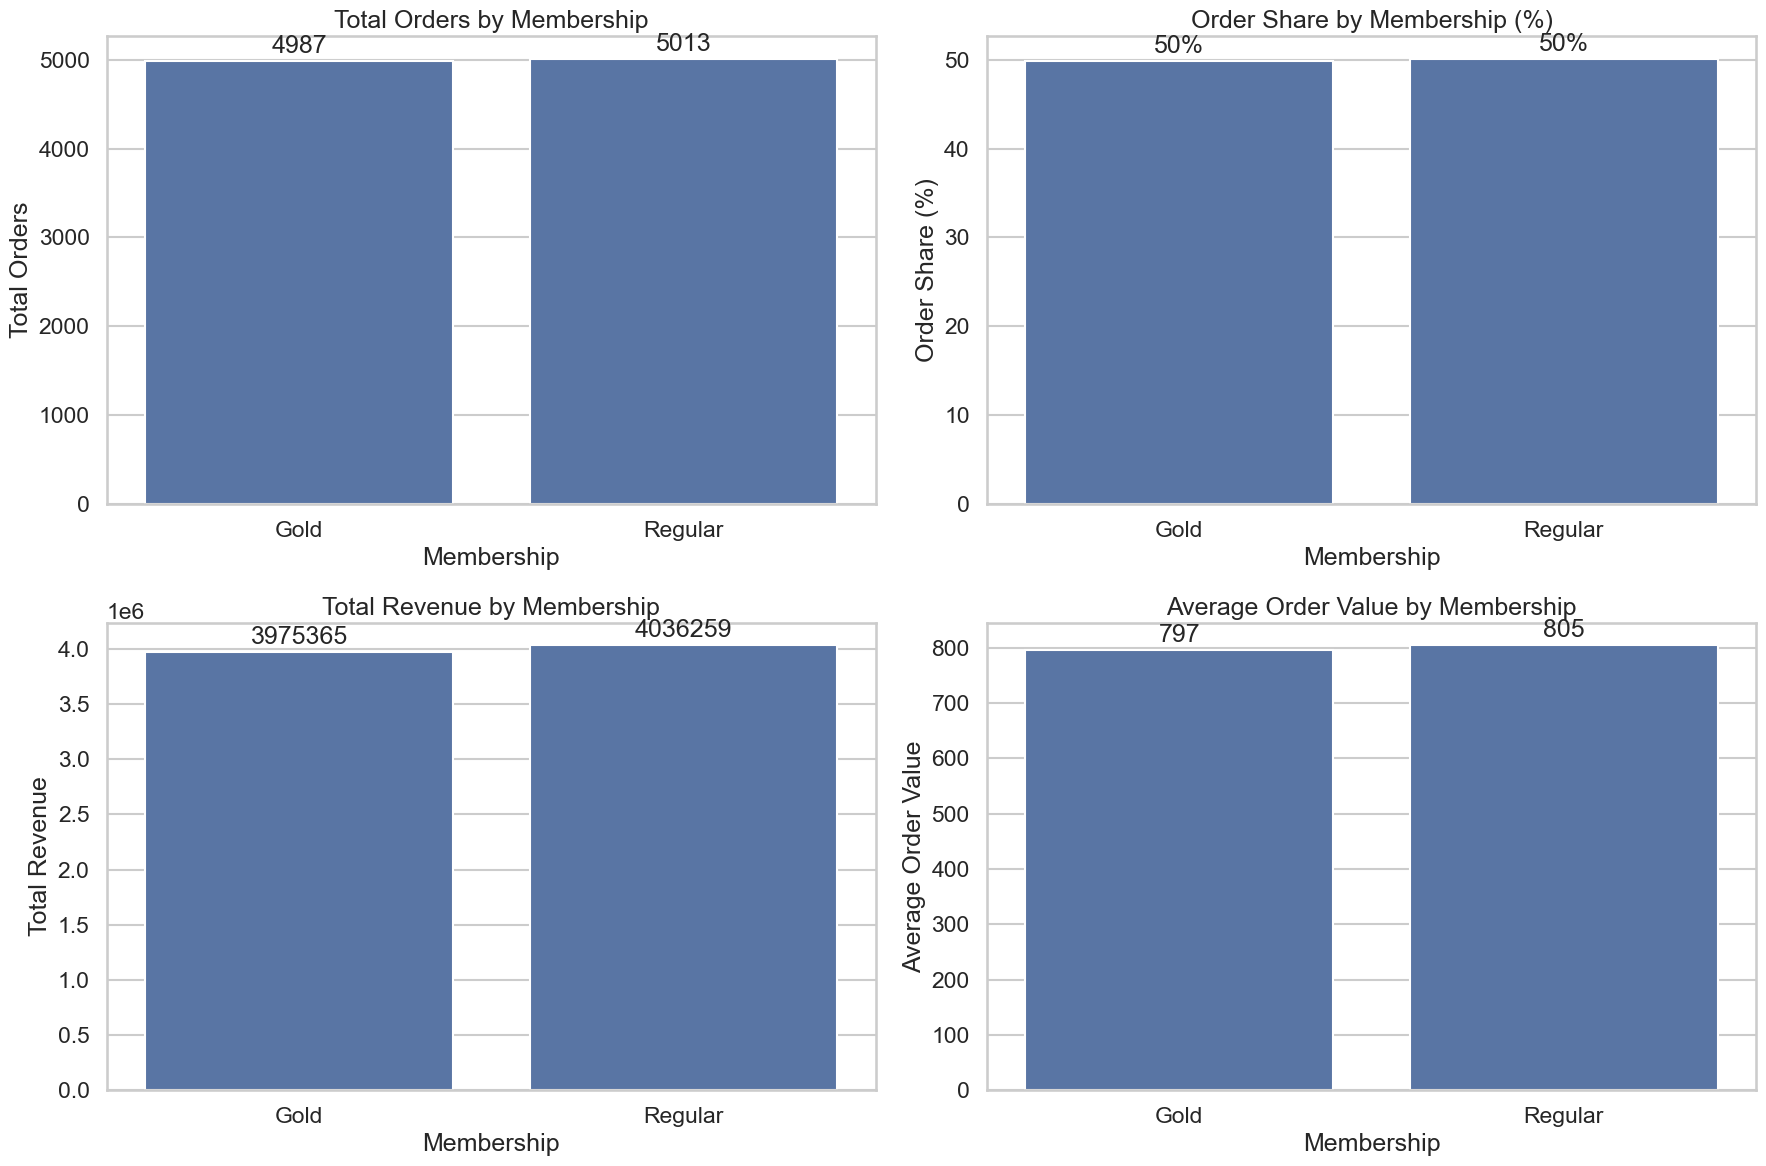

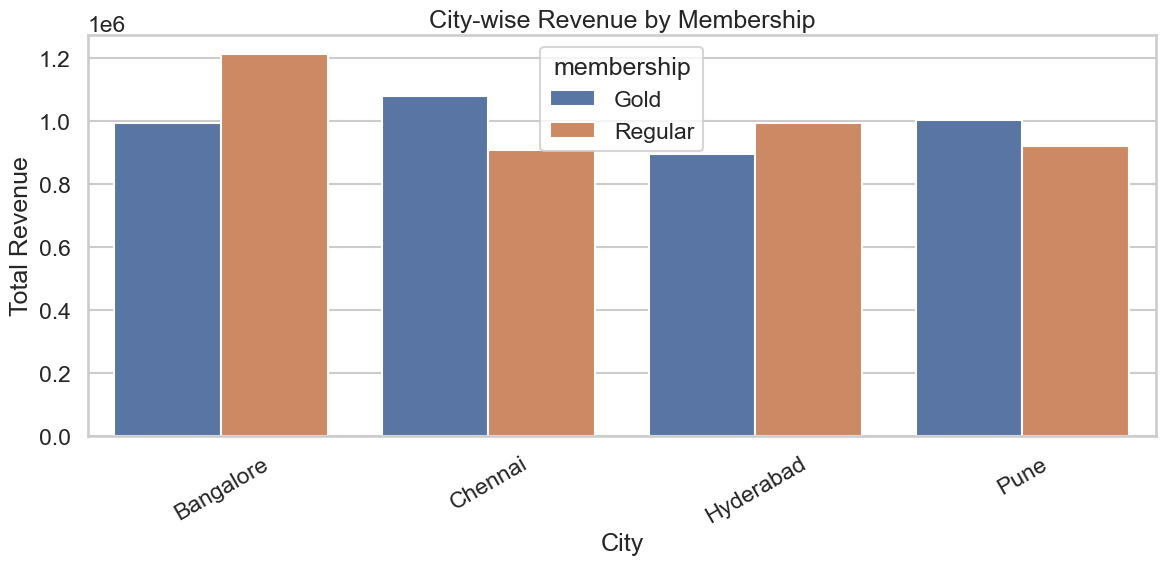

In [14]:
final_df["total_amount"] = pd.to_numeric(final_df["total_amount"], errors="coerce")

membership_orders = (
    final_df
    .dropna(subset=["membership"])
    .groupby("membership", as_index=False)
    .agg(total_orders=("order_id", "nunique"))
)

membership_orders["order_pct"] = (
    membership_orders["total_orders"] / membership_orders["total_orders"].sum()
) * 100

membership_revenue = (
    final_df
    .dropna(subset=["membership"])
    .groupby("membership", as_index=False)
    .agg(total_revenue=("total_amount", "sum"))
)

membership_aov = (
    final_df
    .dropna(subset=["membership"])
    .groupby("membership", as_index=False)
    .agg(avg_order_value=("total_amount", "mean"))
)

city_membership_revenue = (
    final_df
    .dropna(subset=["city", "membership"])
    .groupby(["city", "membership"], as_index=False)
    .agg(total_revenue=("total_amount", "sum"))
)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))


# Total Orders by Membership Type
ax = axes[0, 0]
bar_ax = sns.barplot(data=membership_orders, x="membership", y="total_orders", ax=ax)
ax.set_title("Total Orders by Membership")
ax.set_xlabel("Membership")
ax.set_ylabel("Total Orders")

for c in bar_ax.containers:
    bar_ax.bar_label(c, fmt="%d", padding=2)


# Order Share Percentage by Membership
ax = axes[0, 1]
bar_ax = sns.barplot(data=membership_orders, x="membership", y="order_pct", ax=ax)
ax.set_title("Order Share by Membership (%)")
ax.set_xlabel("Membership")
ax.set_ylabel("Order Share (%)")

for c in bar_ax.containers:
    bar_ax.bar_label(c, fmt="%.0f%%", padding=2)


# Total Revenue by Membership Type
ax = axes[1, 0]
bar_ax = sns.barplot(data=membership_revenue, x="membership", y="total_revenue", ax=ax)
ax.set_title("Total Revenue by Membership")
ax.set_xlabel("Membership")
ax.set_ylabel("Total Revenue")

for c in bar_ax.containers:
    bar_ax.bar_label(c, fmt="%.0f", padding=2)


# Average Order Value by Membership Type
ax = axes[1, 1]
bar_ax = sns.barplot(data=membership_aov, x="membership", y="avg_order_value", ax=ax)
ax.set_title("Average Order Value by Membership")
ax.set_xlabel("Membership")
ax.set_ylabel("Average Order Value")

for c in bar_ax.containers:
    bar_ax.bar_label(c, fmt="%.0f", padding=2)


plt.tight_layout()
plt.savefig(f"{output_dir}/membership_impact_dashboard.png", dpi=200, bbox_inches="tight")
plt.show()


# City-wise Revenue Comparison by Membership Type
fig, ax = plt.subplots(figsize=(12, 6))

bar_ax = sns.barplot(
    data=city_membership_revenue,
    x="city",
    y="total_revenue",
    hue="membership",
    ax=ax
)

ax.set_title("City-wise Revenue by Membership")
ax.set_xlabel("City")
ax.set_ylabel("Total Revenue")
ax.tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.savefig(f"{output_dir}/city_revenue_by_membership.png", dpi=200, bbox_inches="tight")
plt.show()


Membership Impact (Gold vs Regular)

- Gold members contribute a higher share of revenue and have a higher average order value compared to Regular members.
- City-wise analysis shows that Gold members generate maximum revenue in specific high-performing cities.

5. Revenue distribution and seasonality

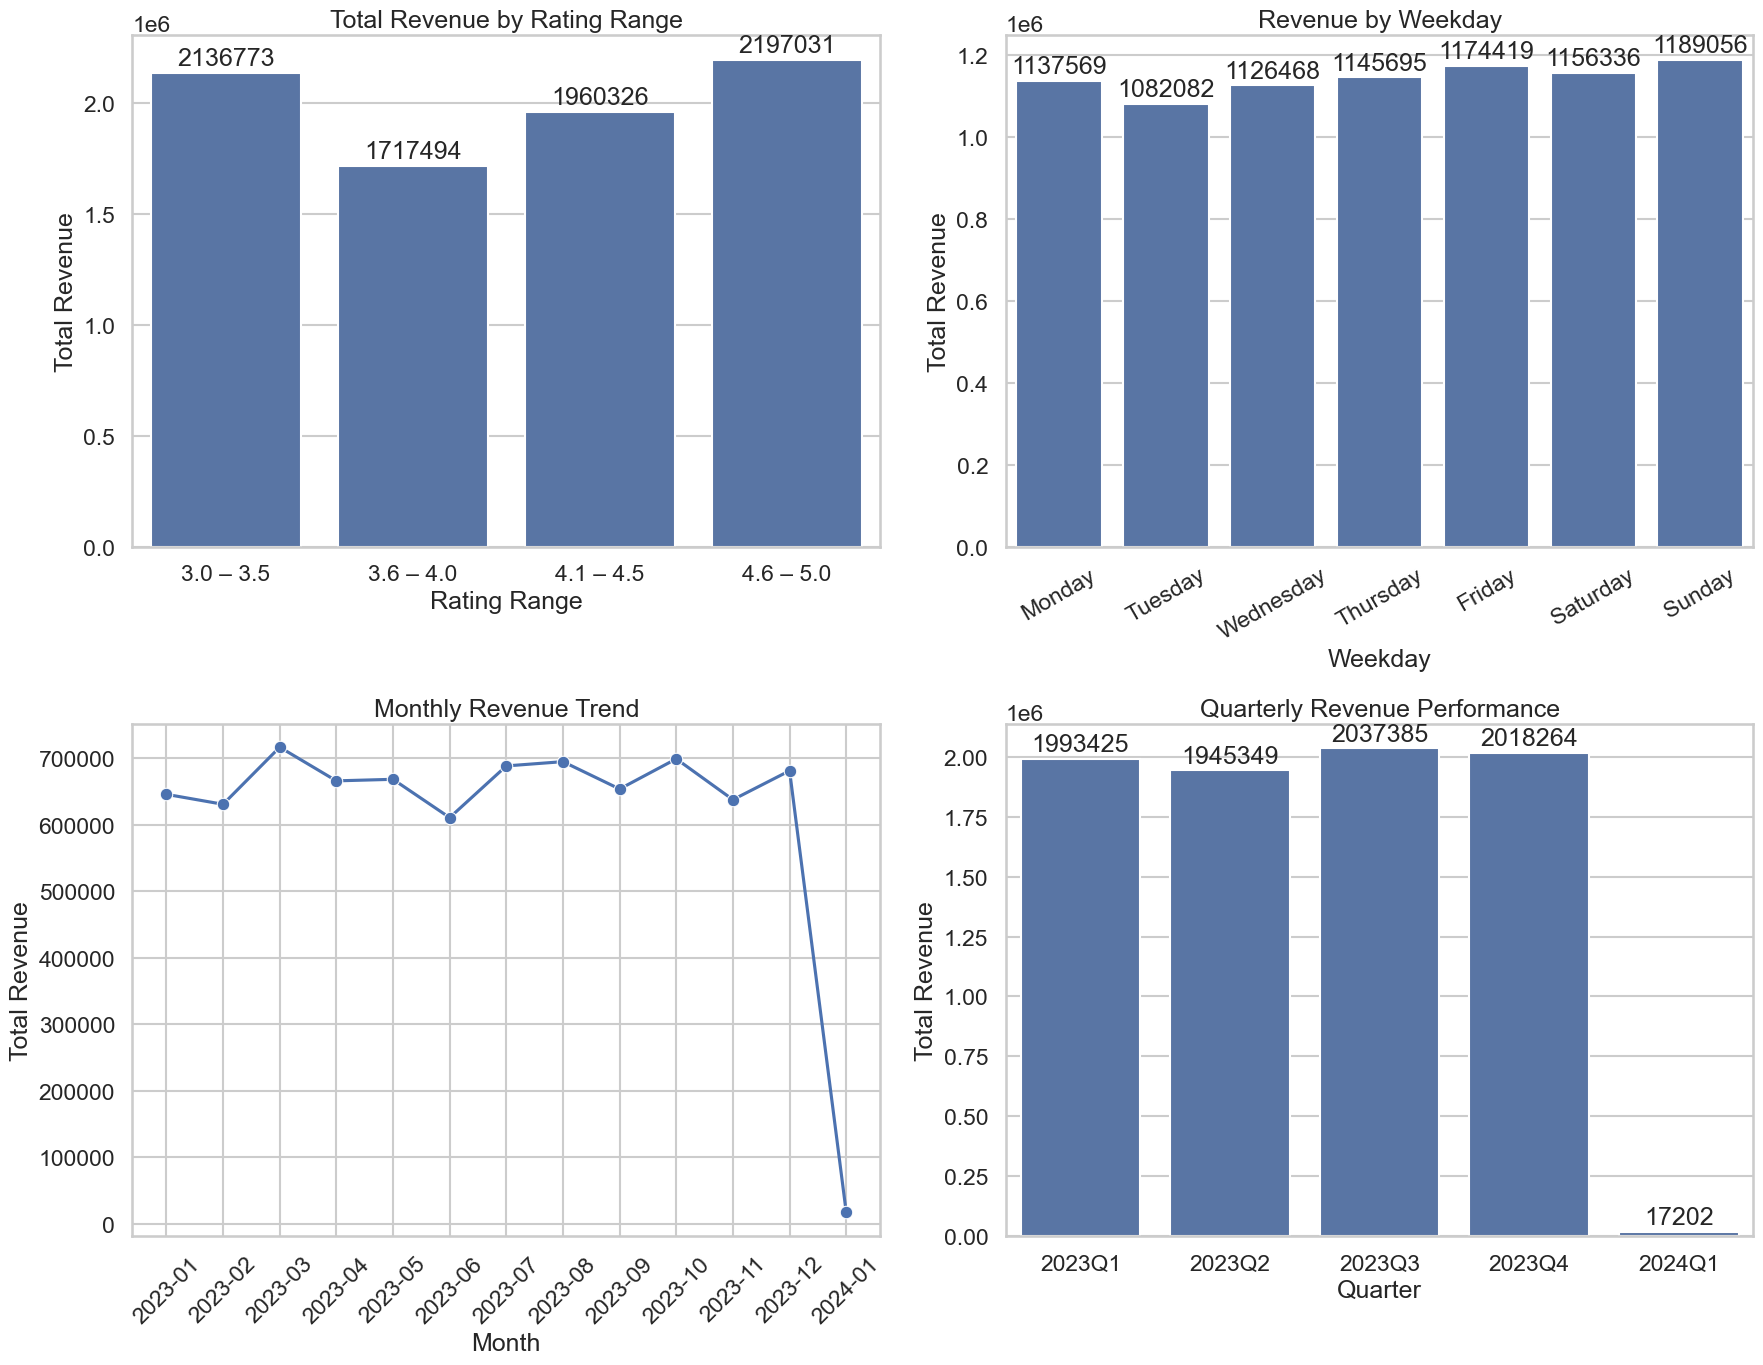

In [15]:
final_df["order_date"] = pd.to_datetime(final_df["order_date"], errors="coerce")
final_df["total_amount"] = pd.to_numeric(final_df["total_amount"], errors="coerce")

final_df["month"] = final_df["order_date"].dt.to_period("M")

monthly_revenue = (
    final_df
    .groupby("month", as_index=False, observed = True)
    .agg(total_revenue=("total_amount", "sum"))
)

monthly_revenue["month_str"] = monthly_revenue["month"].astype(str)

final_df["quarter"] = final_df["order_date"].dt.to_period("Q")

quarterly_revenue = (
    final_df
    .groupby("quarter", as_index=False, observed = True)
    .agg(total_revenue=("total_amount", "sum"))
)

quarterly_revenue["quarter_str"] = quarterly_revenue["quarter"].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0 – 3.5", "3.6 – 4.0", "4.1 – 4.5", "4.6 – 5.0"]

final_df["rating_range"] = pd.cut(
    final_df["rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

rating_revenue = (
    final_df
    .groupby("rating_range", as_index=False, observed = True)
    .agg(total_revenue=("total_amount", "sum"))
)

bar_ax = sns.barplot(
    data=rating_revenue,
    x="rating_range",
    y="total_revenue",
    ax=axes[0, 0]
)

axes[0, 0].set_title("Total Revenue by Rating Range")
axes[0, 0].set_xlabel("Rating Range")
axes[0, 0].set_ylabel("Total Revenue")

for c in bar_ax.containers:
    bar_ax.bar_label(c, fmt="%.0f", padding=2)


final_df["weekday"] = final_df["order_date"].dt.day_name()

weekday_revenue = (
    final_df
    .groupby("weekday", as_index=False, observed = True)
    .agg(total_revenue=("total_amount", "sum"))
)

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_revenue["weekday"] = pd.Categorical(
    weekday_revenue["weekday"],
    categories=weekday_order,
    ordered=True
)

weekday_revenue = weekday_revenue.sort_values("weekday")

bar_ax_w = sns.barplot(
    data=weekday_revenue,
    x="weekday",
    y="total_revenue",
    ax=axes[0, 1]
)

axes[0, 1].set_title("Revenue by Weekday")
axes[0, 1].set_xlabel("Weekday")
axes[0, 1].set_ylabel("Total Revenue")
axes[0, 1].tick_params(axis="x", rotation=30)

for c in bar_ax_w.containers:
    bar_ax_w.bar_label(c, fmt="%.0f", padding=2)


sns.lineplot(
    data=monthly_revenue,
    x="month_str",
    y="total_revenue",
    marker="o",
    ax=axes[1, 0]
)

axes[1, 0].set_title("Monthly Revenue Trend")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Total Revenue")
axes[1, 0].tick_params(axis="x", rotation=45)


bar_ax_q = sns.barplot(
    data=quarterly_revenue,
    x="quarter_str",
    y="total_revenue",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Quarterly Revenue Performance")
axes[1, 1].set_xlabel("Quarter")
axes[1, 1].set_ylabel("Total Revenue")

for c in bar_ax_q.containers:
    bar_ax_q.bar_label(c, fmt="%.0f", padding=2)

plt.tight_layout()
plt.savefig(f"{output_dir}/revenue_distribution_seasonality.png", dpi=200, bbox_inches="tight")
plt.show()


Revenue Distribution and Seasonality

- Revenue distribution shows that most orders fall in a moderate price range, with a few high-value outliers.
- Monthly and quarterly trends reveal seasonal peaks, indicating periods of higher customer spending.


Code for all questions

In [16]:
df = pd.read_csv("final_food_delivery_dataset.csv")

df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["total_amount"] = pd.to_numeric(df["total_amount"], errors="coerce")

# MCQ + Numerical Answers

gold_df = df[df["membership"] == "Gold"]

print("1. Gold revenue city:", 
      gold_df.groupby("city")["total_amount"].sum().idxmax())

print("2. Highest AOV cuisine:",
      df.groupby("cuisine")["total_amount"].mean().idxmax())

user_spend = df.groupby("user_id")["total_amount"].sum()
count_1000 = (user_spend > 1000).sum()
print("3. Users >1000:", count_1000)

bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]

df["rating_range"] = pd.cut(df["rating"], bins=bins, labels=labels)

print("4. Top rating range:",
      df.groupby("rating_range")["total_amount"].sum().idxmax())

print("5. Gold city highest AOV:",
      gold_df.groupby("city")["total_amount"].mean().idxmax())

cuisine_stats = df.groupby("cuisine").agg(
    restaurants=("restaurant_id", "nunique"),
    revenue=("total_amount", "sum")
)

min_rest = cuisine_stats["restaurants"].min()
print("6. Low-rest high-rev cuisine:",
      cuisine_stats[cuisine_stats["restaurants"]==min_rest]["revenue"].idxmax())

total_orders = df["order_id"].nunique()
gold_orders = gold_df["order_id"].nunique()

print("7. % Gold orders:",
      round((gold_orders/total_orders)*100))

rest_stats = (
    final_df
    .drop_duplicates(subset=["order_id"])
    .groupby("restaurant_name_x", as_index=False)
    .agg(
        total_orders=("order_id", "nunique"),
        avg_order_value=("total_amount", "mean")
    )
)

eligible = rest_stats[rest_stats["total_orders"] < 20]

eligible.sort_values("avg_order_value", ascending=False).head(1)['restaurant_name_x']

print("8. Top AOV <20 orders:",
      eligible.sort_values("avg_order_value", ascending=False).head(1)['restaurant_name_x'])

print("9. Best combo:",
      df.groupby(["membership","cuisine"])["total_amount"].sum().idxmax())

df["quarter"] = df["order_date"].dt.to_period("Q")

print("10. Best quarter:",
      df.groupby("quarter")["total_amount"].sum().idxmax())

print("11. Gold total orders:", gold_orders)

print("12. Hyderabad revenue:",
      round(df[df["city"]=="Hyderabad"]["total_amount"].sum()))

print("13. Distinct users:",
      df["user_id"].nunique())

print("14. Gold AOV:",
      round(gold_df["total_amount"].mean(),2))

print("15. Orders rating >=4.5:",
      df[df["rating"]>=4.5]["order_id"].nunique())

top_gold_city = gold_df.groupby("city")["total_amount"].sum().idxmax()

print("16. Orders in top Gold city:",
      gold_df[gold_df["city"]==top_gold_city]["order_id"].nunique())

1. Gold revenue city: Chennai
2. Highest AOV cuisine: Mexican
3. Users >1000: 2544
4. Top rating range: 4.6–5.0
5. Gold city highest AOV: Chennai
6. Low-rest high-rev cuisine: Chinese
7. % Gold orders: 50
8. Top AOV <20 orders: 173    Hotel Dhaba Multicuisine
Name: restaurant_name_x, dtype: object
9. Best combo: ('Regular', 'Mexican')
10. Best quarter: 2023Q3
11. Gold total orders: 4987
12. Hyderabad revenue: 1889367
13. Distinct users: 2883
14. Gold AOV: 797.15
15. Orders rating >=4.5: 3374
16. Orders in top Gold city: 1337
